In [84]:
import sys
import os
import numpy as np
import pandas as pd

# 将项目根目录添加到 sys.path
#current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from training import train, train_per_iteration
import torch
from utils import ring1, show_row, Row

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    # 设置图例为2行3列，并放置在右上角
    plt.legend(legend, prop={'size': 35, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.05, 1), ncol=1)
    
    plt.xlabel('Comm. Rounds', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 自定义x_tick显示，将数值除以100
    def format_x_tick(x, pos):
        return f'{x/1:.0f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_tick))
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    plt.title("Nearest Neighbor", fontsize=47, fontweight='bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)  # 调整右侧边距以容纳图例
    plt.savefig(save, bbox_inches='tight')
    plt.show()

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow_accuracy(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.plot(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.plot(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.plot(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    plt.legend(legend, prop={'size': 35, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.05, 0.49), ncol=1)
    plt.xlabel('Comm. Rounds', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置 y 轴范围为 0 到 100
    plt.ylim(0, 100)
    
    # 设置 y 轴刻度为 0%, 20%, 40%, 60%, 80%, 100%
    plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=35, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    
    plt.grid(True)
    plt.title("Nearest Neighbor", fontsize=47, fontweight='bold')
    plt.subplots_adjust(left=0.21, bottom=0.15)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)
    plt.savefig(save, bbox_inches='tight')
    plt.show()

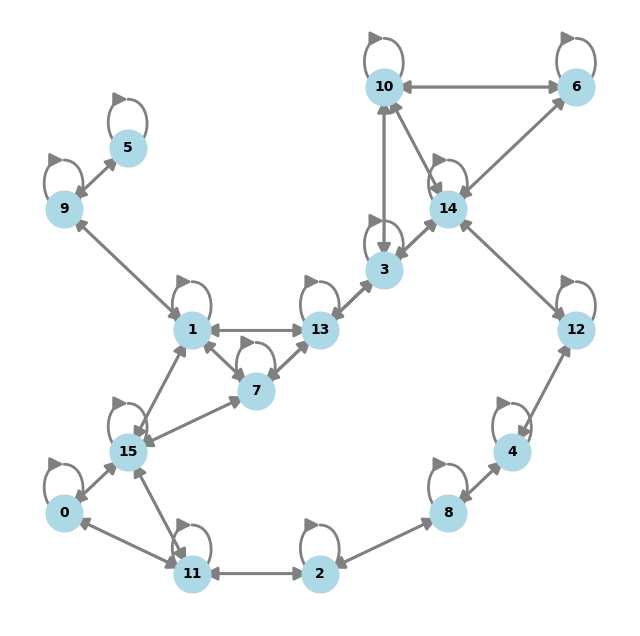

In [39]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 定义16个点的坐标
positions = np.array([
    [1,2], [3,5], [5,1], [6,6], [8,3], [2,8], [9,9], [4,4],
    [7,2], [1,7], [6,9], [3,1], [9,5], [5,5], [7,7], [2,3]
])

# 创建图
G = nx.DiGraph()  # 使用有向图以添加箭头
for i in range(len(positions)):
    G.add_node(i, pos=positions[i])

# 连接阈值距离内的点（双向边）
threshold = 3
for i in range(len(positions)):
    for j in range(i + 1, len(positions)):
        dist = np.linalg.norm(positions[i] - positions[j])
        if dist <= threshold:
            G.add_edge(i, j)
            G.add_edge(j, i)  # 添加双向边

# 添加自环（self-loop）
for i in range(len(positions)):
    G.add_edge(i, i)

# 绘制图
pos = {i: positions[i] for i in range(len(positions))}

plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# 绘制边并加粗
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# 绘制自环（手动调整自环位置）
for i in range(len(positions)):
    plt.annotate("",
                 xy=pos[i], xycoords='data',
                 xytext=(pos[i][0] + 0.2, pos[i][1] + 0.2), textcoords='data')

# 隐藏边框和坐标轴
plt.axis('off')

# 保存为PDF，无边框透明背景
plt.savefig("几何图_n=16.pdf", format='pdf', bbox_inches='tight', transparent=True)

# 显示图像
plt.show()

In [64]:
import numpy as np
import networkx as nx

def generate_row_stochastic_matrix_with_self_loops(seed=42):
    np.random.seed(seed)
    
    # 定义16个点的坐标
    positions = np.array([
        [1,2], [3,5], [5,1], [6,6], [8,3], [2,8], [9,9], [4,4],
        [7,2], [1,7], [6,9], [3,1], [9,5], [5,5], [7,7], [2,3]
    ])

    # 创建图
    G = nx.Graph()
    for i in range(len(positions)):
        G.add_node(i, pos=positions[i])

    # 连接阈值距离内的点
    threshold = 3
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist <= threshold:
                G.add_edge(i, j)

    # 初始化邻接矩阵
    A = np.zeros((len(positions), len(positions)))

    # 赋值非负值 1 或 2 给边
    for i, j in G.edges():
        value = np.random.choice([1, 2])
        A[i, j] = value
        A[j, i] = value  # 确保矩阵对称

    # 为对角线元素赋值1或2，确保自环
    for i in range(len(positions)):
        A[i, i] = np.random.choice([1, 2])

    # 归一化每行，使其成为行随机矩阵
    row_sums = A.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # 防止除零错误
    A /= row_sums

    return A

In [26]:
# 生成并打印行随机矩阵
A = generate_row_stochastic_matrix_with_self_loops(seed=48)
show_row(A)

A的第二大特征值: 0.9155642065527961
A的beta: 0.9155642065527961
A的spectral gap: 0.08443579344720387
A的kappa: 3.0000000000000346
S_A是: 198.8362710163049 



In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n=16
A = generate_row_stochastic_matrix_with_self_loops(seed=48)
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print(A.shape)

A的第二大特征值: 0.9155642065527961
A的beta: 0.9155642065527961
A的spectral gap: 0.08443579344720387
A的kappa: 3.0000000000000346
S_A是: 198.8362710163049 

(16, 16)


In [28]:
train_per_iteration(
    algorithm="PullDiag_GT",
    lr=2e-2,
    A=A,
    dataset_name="MNIST",
    batch_size=128,
    num_epochs=10,
    remark=f"MG={k}, 几何图16",
)

每个节点分配到的图片数目是 3125
每个epoch执行的iteration次数是 30
optimizer初始化成功!


Training Progress: 100%|██████████| 10/10 [11:56<00:00, 71.69s/it, epoch=10, test_accuracy=94.2300%, test_loss=0.3316, train_average_accuracy=93.9300%, train_loss=0.6442]


,epoch,batch,iteration,train_loss(total),train_loss(average),train_accuracy(average),test_loss(average),test_accuracy(average)
0,1,1,1,2.3442,2.3026,0.0986,2.3028,0.0958
1,1,2,2,2.3187,2.3026,0.0986,2.3027,0.0958
2,1,3,3,2.3124,2.3026,0.0986,2.3027,0.0958
3,1,4,4,2.2988,2.3026,0.0986,2.3027,0.0958
4,1,5,5,2.2910,2.3025,0.0986,2.3026,0.0958
...,...,...,...,...,...,...,...,...
295,10,26,296,0.6021,0.3428,0.9393,0.3370,0.9408
296,10,27,297,0.5930,0.3411,0.9394,0.3354,0.9418
297,10,28,298,0.5942,0.3393,0.9398,0.3331,0.9420
298,10,29,299,0.5867,0.3380,0.9396,0.3323,0.9421


In [85]:
import pandas as pd
df1 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=1,_几何图16_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-27.csv")
df2 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=5,_几何图16_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-27.csv")
df3 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=10,_几何图16_PullDiag_GT_lr=0.03_n=16_bs=128_2025-01-27.csv")

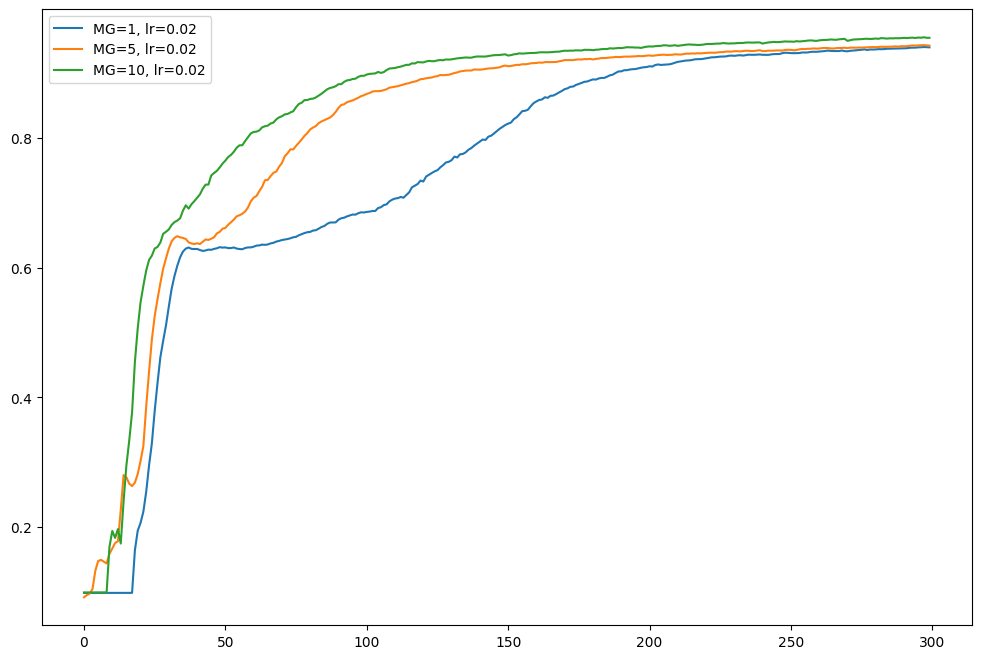

In [86]:
a="train_accuracy(average)"

plt.plot(df1[a], label="MG=1, lr=0.02")
plt.plot(df2[a], label="MG=5, lr=0.02")
plt.plot(df3[a], label="MG=10, lr=0.02")
plt.legend()
plt.show()

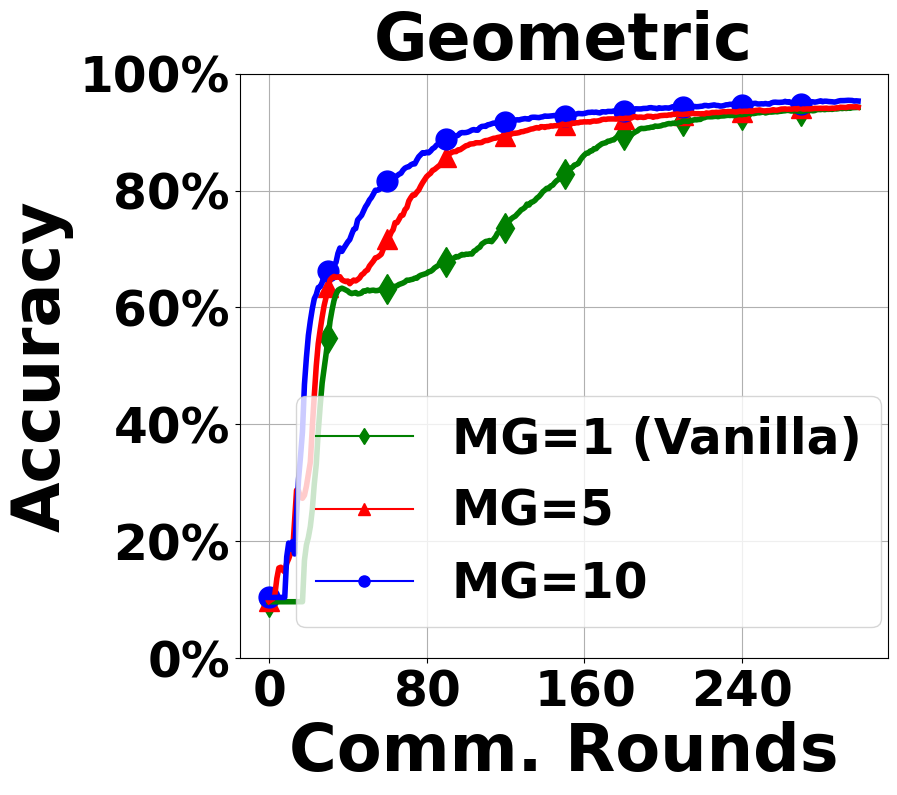

In [93]:
a = "test_accuracy(average)"

i=100

grads = [
    df1[a]*i,
    df2[a]*i,
    df3[a]*i,
]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow_accuracy(grads, legend, save='MG_几何图_Accuracy(A)0127.pdf', ylabel='Accuracy')

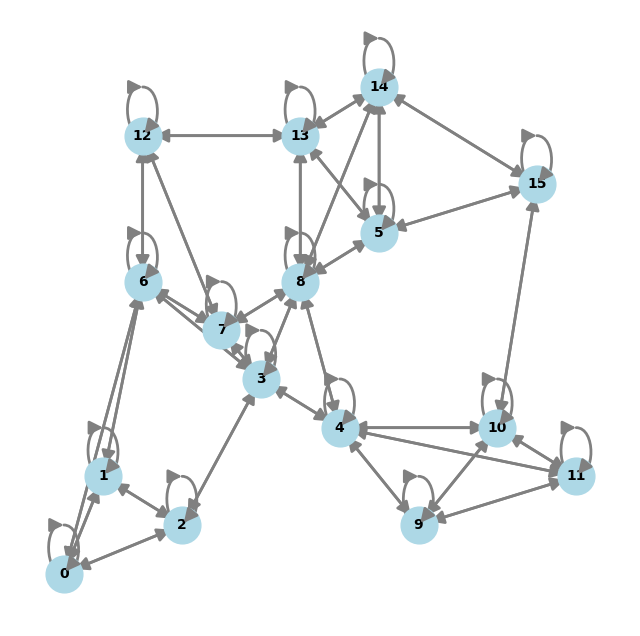

In [99]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Define the positions of 16 nodes
positions = {
    0: (0, 0),  1: (1, 2),  2: (3, 1),  3: (5, 4),
    4: (7, 3),  5: (8, 7),  6: (2, 6),  7: (4, 5),
    8: (6, 6),  9: (9, 1), 10: (11, 3), 11: (13, 2),
    12: (2, 9), 13: (6, 9), 14: (8, 10), 15: (12, 8)
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for node in positions:
    G.add_node(node)

# Define k-nearest neighbors (k=3)
k = 3

# Compute edges based on Euclidean distance
for node in G.nodes():
    distances = {n: np.linalg.norm(
        [positions[node][0] - positions[n][0], positions[node][1] - positions[n][1]]
    ) for n in G.nodes() if n != node}
    
    # Get k nearest neighbors
    nearest_neighbors = sorted(distances, key=distances.get)[:k]
    
    # Add bidirectional edges and self-loops
    for neighbor in nearest_neighbors:
        G.add_edge(node, neighbor)
        G.add_edge(neighbor, node)
    G.add_edge(node, node)  # Self-loop

# Convert positions for drawing
pos = {i: positions[i] for i in positions}

plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with arrow style and increased size
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Draw self-loops manually
for i in positions:
    plt.annotate("",
                 xy=pos[i], xycoords='data',
                 xytext=(pos[i][0] + 0.2, pos[i][1] + 0.2), textcoords='data',
                 arrowprops=dict(arrowstyle='-|>', color='gray', lw=2, mutation_scale=20))

# Remove border and axes
plt.axis('off')

# Save the figure as a PDF with no border and transparent background
plt.savefig("临近图(n=16).pdf", format='pdf', bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

In [43]:
import numpy as np
import networkx as nx

def generate_row_stochastic_matrix(seed, G):
    np.random.seed(seed)
    n = len(G.nodes)
    A = np.zeros((n, n))

    # Assign values to the adjacency matrix based on graph edges
    for i, j in G.edges():
        A[i, j] = np.random.choice([1, 2])  # Assign random values 1 or 2

    # Ensure self-loops are positive and random
    for i in range(n):
        A[i, i] = np.random.choice([1, 2])

    # Normalize each row to make it row stochastic (row sums to 1)
    row_sums = A.sum(axis=1, keepdims=True)
    A = A / row_sums

    return A

# Define the graph structure from the previous example
positions = {
    0: (0, 0),  1: (1, 2),  2: (3, 1),  3: (5, 4),
    4: (7, 3),  5: (8, 7),  6: (2, 6),  7: (4, 5),
    8: (6, 6),  9: (9, 1), 10: (11, 3), 11: (13, 2),
    12: (2, 9), 13: (6, 9), 14: (8, 10), 15: (12, 8)
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for node in positions:
    G.add_node(node)

# Define k-nearest neighbors (k=3)
k = 3

# Compute edges based on Euclidean distance
for node in G.nodes():
    distances = {n: np.linalg.norm(
        [positions[node][0] - positions[n][0], positions[node][1] - positions[n][1]]
    ) for n in G.nodes() if n != node}
    
    # Get k nearest neighbors
    nearest_neighbors = sorted(distances, key=distances.get)[:k]
    
    # Add bidirectional edges and self-loops
    for neighbor in nearest_neighbors:
        G.add_edge(node, neighbor)
        G.add_edge(neighbor, node)
    G.add_edge(node, node)  # Self-loop

In [48]:
# Generate the row-stochastic matrix with a given seed
seed_value = 42
A = generate_row_stochastic_matrix(seed_value, G)

# Display the resulting matrix
show_row(A)

A的第二大特征值: 0.9030060544888956
A的beta: 0.9065491237356503
A的spectral gap: 0.09345087626434967
A的kappa: 1.7395702888660751
S_A是: 133.00148136953007 



In [94]:
import pandas as pd
df1 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=1,_临近图16_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-27.csv")
df2 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=5,_临近图16_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-27.csv")
df3 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=10,_临近图16_PullDiag_GT_lr=0.02_n=16_bs=128_2025-01-27.csv")

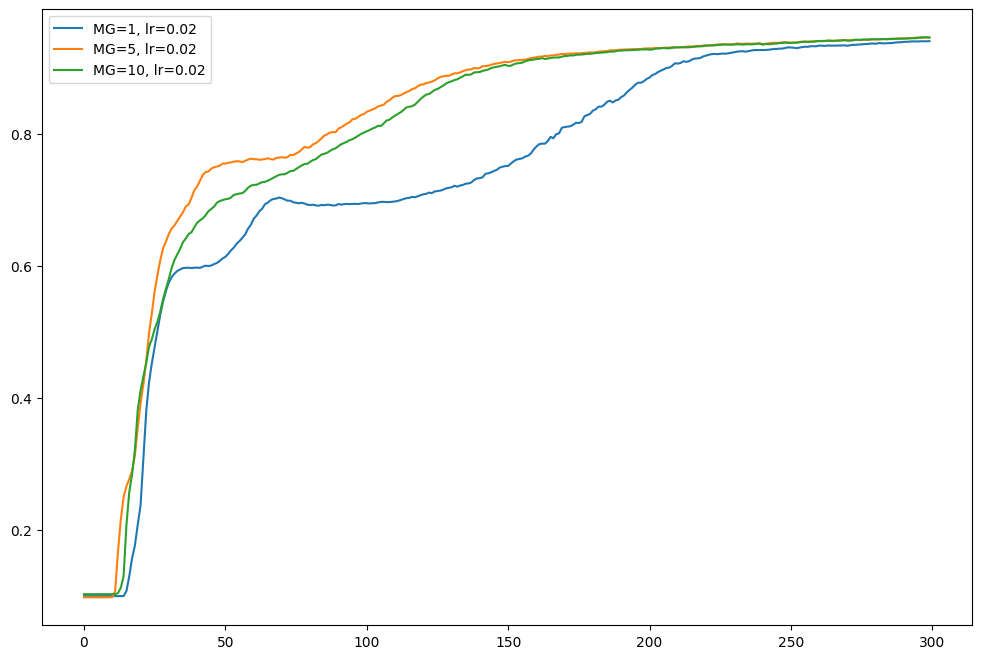

In [95]:
a="train_accuracy(average)"

plt.plot(df1[a], label="MG=1, lr=0.02")
plt.plot(df2[a], label="MG=5, lr=0.02")
plt.plot(df3[a], label="MG=10, lr=0.02")
plt.legend()
plt.show()

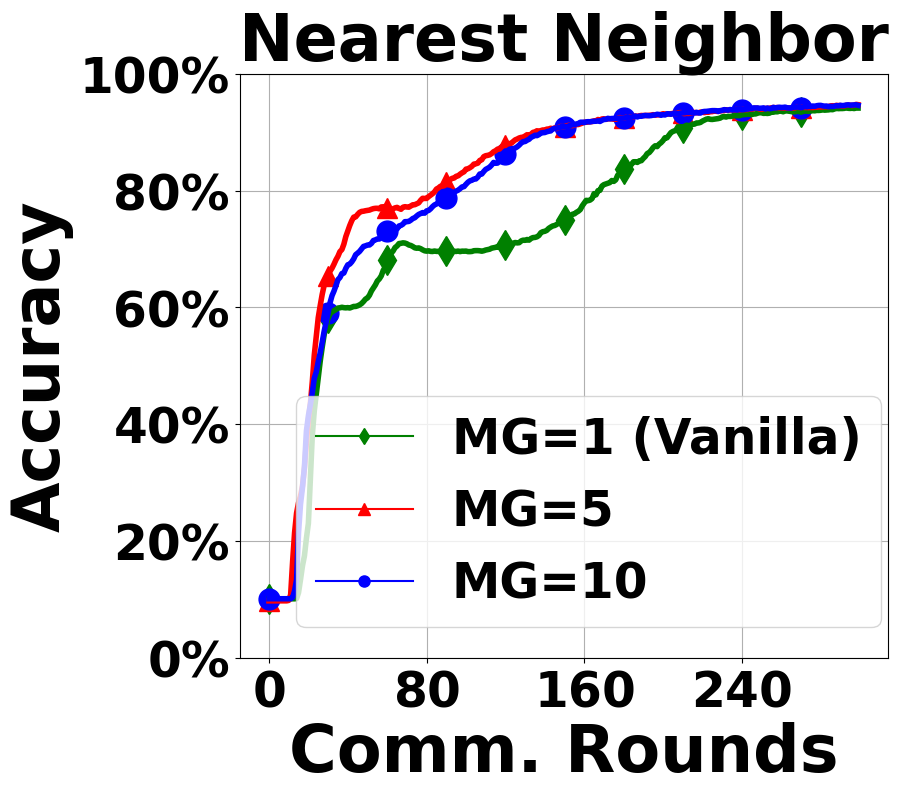

In [97]:
a = "test_accuracy(average)"

i=100

grads = [
    df1[a]*i,
    df2[a]*i,
    df3[a]*i,
]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow_accuracy(grads, legend, save='MG_临近图_Accuracy(A)0127.pdf', ylabel='Accuracy')